## PRUEBA TEAM CHALLENGE: TOOLBOX (I)

CARGAR LA BASE DE DATOS

In [4]:
# Archivo de prueba: test_toolbox.ipynb

import pandas as pd
from toolbox_ML import describe_df  # Importar la función desde el módulo

# Ruta del dataset Titanic
# titanic_path = r'C:\Users\migue\Documents\GitHub\rafaneda7-Team-Challenge---Team-Frosties\data\titanic.csv'

# Cargar el dataset
#titanic_df = pd.read_csv(titanic_path)
titanic_df = pd.read_csv("./data/titanic_modified.csv")
# Crear una copia del DataFrame
titanic_copy = titanic_df.copy()

# Usar la función describe_df
description = describe_df(titanic_copy)

# Mostrar los resultados
print(description)

  Column Name Data Type  Null Percentage (%)  Unique Values  Cardinality (%)
0    Survived     int64                  0.0              2         0.224467
1      Pclass     int64                  0.0              3         0.336700
2         Sex     int64                  0.0              2         0.224467
3         Age   float64                  0.0             94        10.549944
4       SibSp     int64                  0.0              7         0.785634
5       Parch     int64                  0.0              7         0.785634
6  MissingAge     int64                  0.0              2         0.224467
7      Spouse     int64                  0.0              2         0.224467


In [5]:
titanic_copy.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,MissingAge,Spouse
0,0,3,1,22.000000,1,0,0,1
1,1,1,0,38.000000,1,0,0,1
2,1,3,0,26.000000,0,0,0,0
3,1,1,0,35.000000,1,0,0,1
4,0,3,1,35.000000,0,0,0,0
5,0,3,1,26.507589,0,0,1,0
6,0,1,1,54.000000,0,0,0,0
7,0,3,1,2.000000,3,1,0,0
8,1,3,0,27.000000,0,2,0,0
9,1,2,0,14.000000,1,0,0,0


In [6]:
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   MissingAge  891 non-null    int64  
 7   Spouse      891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [7]:
import toolbox_ML
print(dir(toolbox_ML))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'chi2_contingency', 'describe_df', 'get_features_cat_regression', 'get_features_num_regression', 'np', 'pd', 'plot_features_cat_regression', 'plot_features_num_regression', 'plt', 'sns', 'tipifica_variables']


In [8]:
from toolbox_ML import tipifica_variables

# Definir los umbrales
umbral_categoria = 10
umbral_continua = 0.1

# Probar la función
tipo_variables = tipifica_variables(titanic_copy, umbral_categoria, umbral_continua)
print(tipo_variables)


  nombre_variable      tipo_sugerido
0        Survived            Binaria
1          Pclass         Categórica
2             Sex            Binaria
3             Age  Numérica Continua
4           SibSp         Categórica
5           Parch         Categórica
6      MissingAge            Binaria
7          Spouse            Binaria


# get_features_num_regression

In [10]:
from toolbox_ML import get_features_num_regression

get_features_num_regression(titanic_copy, "sex", 0.4)

Error: target_col no es una columna numérica válida del DataFrame.


# plot_features_num_regression

In [ ]:
columnas = df_USA_Housing.columns.to_list()
columnas

In [ ]:
from toolbox_ML import plot_features_num_regression

plot_features_num_regression(df_USA_Housing, "Price", ["Avg. Area Income",
 "Avg. Area House Age",
 "Avg. Area Number of Rooms",
 "Avg. Area Number of Bedrooms",
 "Area Population",
 "Price"], 0.4, 0.05)

***

## Get_features_cat_regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
from toolbox_ML import get_features_cat_regression

In [6]:
df_titanic = pd.read_csv("./data/titanic_modified.csv")

In [7]:
get_features_cat_regression(df_titanic, target_col="Survived")

['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

***

In [8]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

***

## Plot_features_cat_regression

In [ ]:
import seaborn as sns

In [9]:
from toolbox_ML import plot_features_cat_regression 

In [12]:
df_titanic = pd.read_csv("./data/titanic_modified.csv")

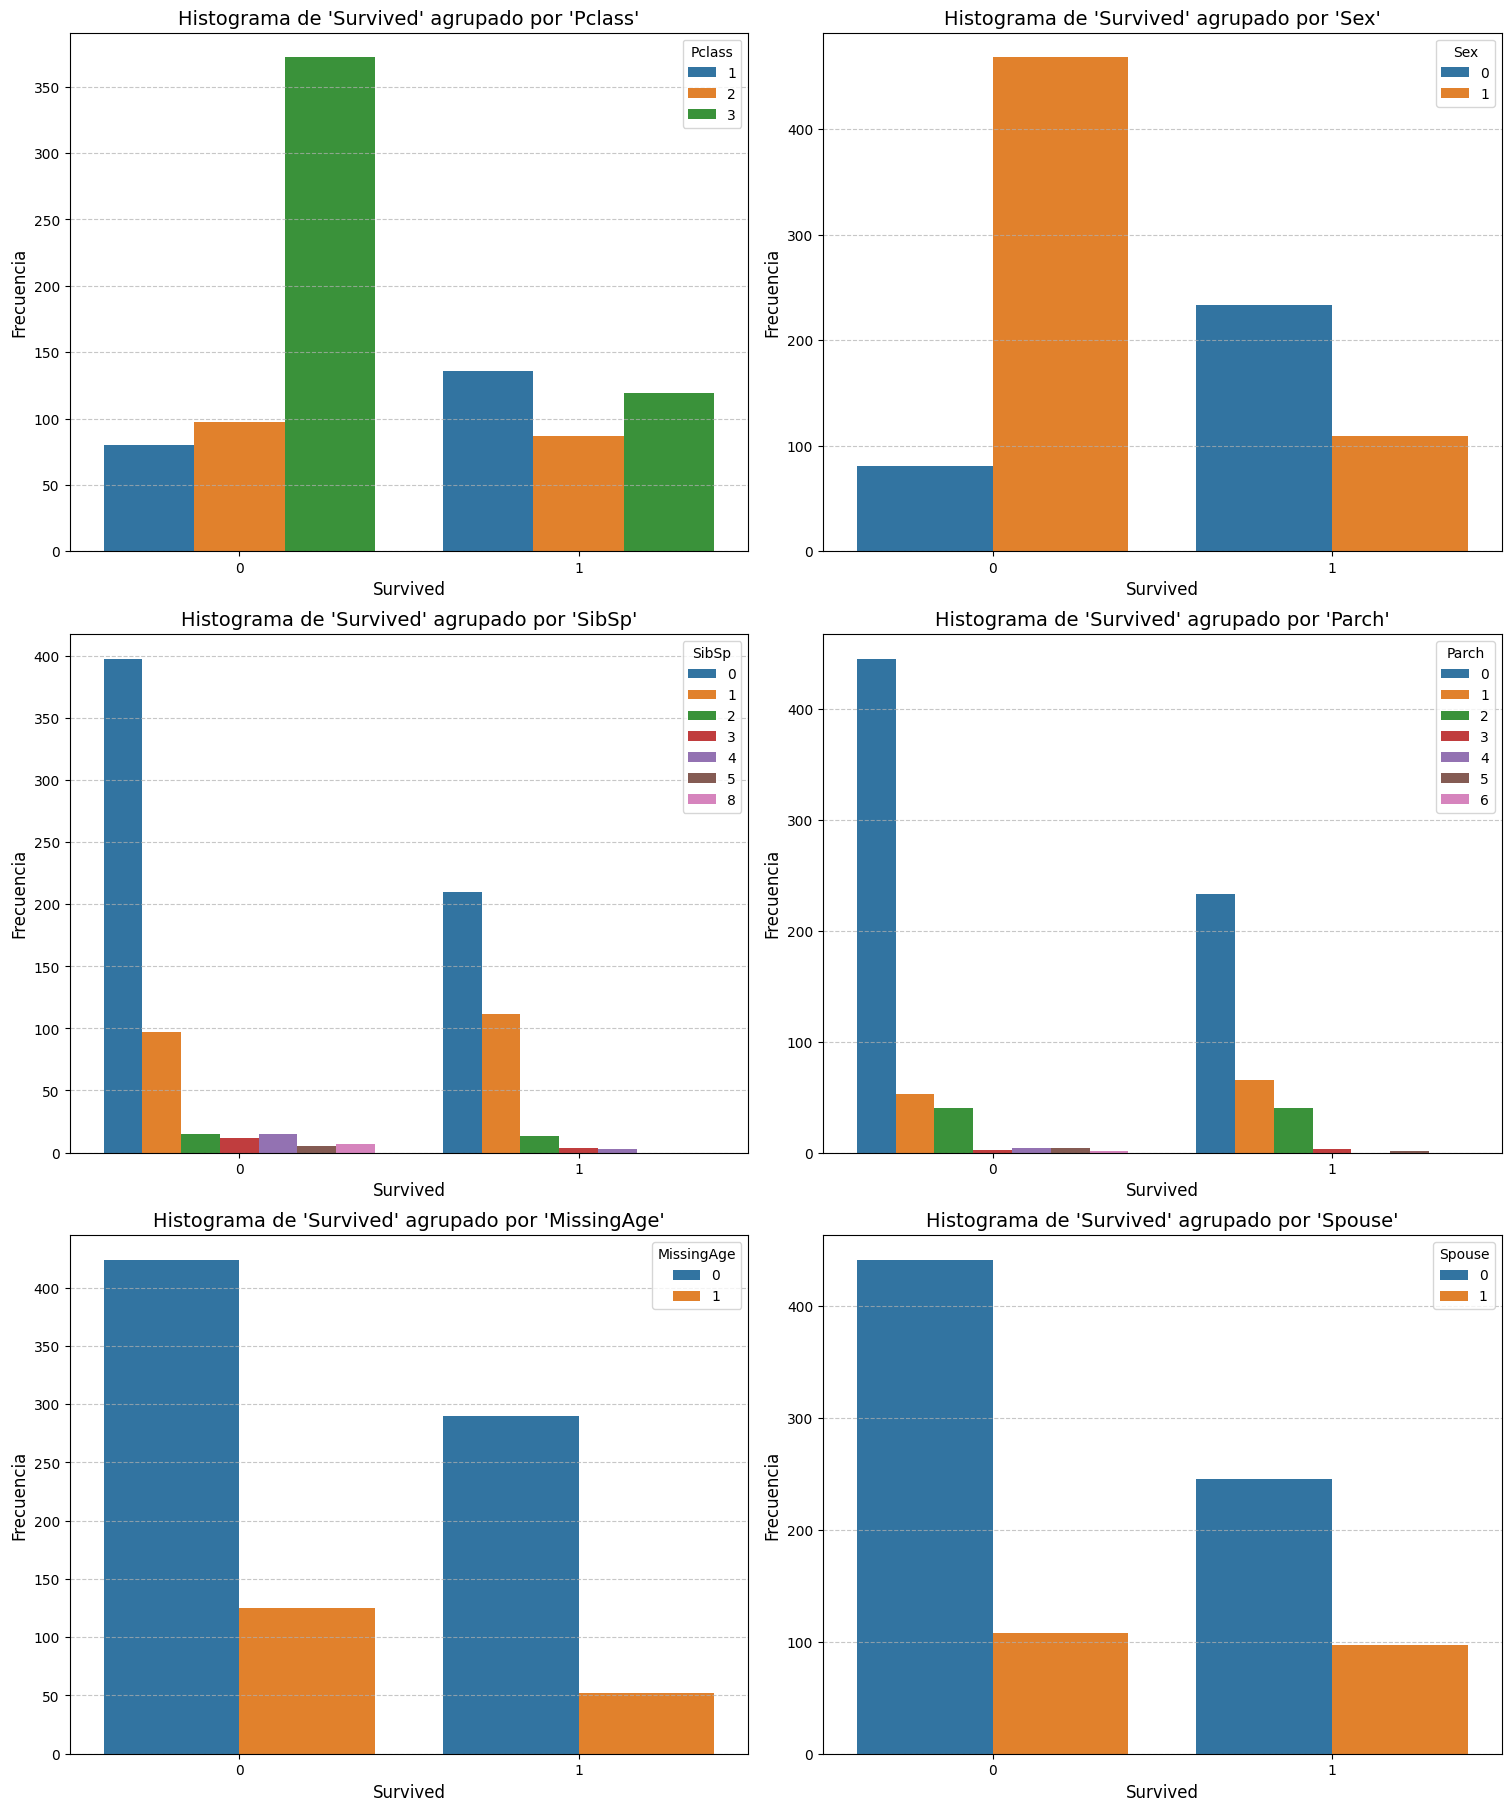

In [10]:
plot_features_cat_regression(df_titanic,target_col="Survived",categorical_columns= columns)


***

***

## Funcion que hace los dos pasos juntos 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def filter_and_plot_features(dataframe, target_col="", columns=None, pvalue=0.05, with_individual_plot=False):
    """
    Filtra y grafica columnas categóricas que tienen una relación significativa con una columna objetivo.

    Parámetros:
    - dataframe: pd.DataFrame. El DataFrame de entrada.
    - target_col: str. Nombre de la columna objetivo.
    - columns: list. Lista de columnas categóricas a evaluar. Si está vacía, se seleccionan automáticamente.
    - pvalue: float. Nivel de significancia para la prueba Chi-cuadrado.
    - with_individual_plot: bool. Si True, genera gráficos individuales para cada columna significativa.

    Retorna:
    - Una lista de columnas que cumplen con las condiciones de significancia.
    """
    if not isinstance(dataframe, pd.DataFrame):
        print("Error: El argumento 'dataframe' debe ser un DataFrame de pandas.")
        return None

    if not target_col or target_col not in dataframe.columns:
        print("Error: La columna objetivo no existe o no se especificó correctamente.")
        return None

    if not np.issubdtype(dataframe[target_col].dtype, np.number):
        print("Error: La columna objetivo debe ser numérica.")
        return None

    if columns is None:
        columns = []

    if not columns:
        # Seleccionar columnas numéricas con baja cardinalidad
        columns = [col for col in dataframe.select_dtypes(include=[np.number]).columns 
                   if col != target_col and dataframe[col].nunique() <= 10]

    if not columns:
        print("No se encontraron columnas para evaluar.")
        return []

    significant_columns = []

    for col in columns:
        try:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(dataframe[col], pd.cut(dataframe[target_col], bins=5))

            # Realizar prueba de Chi-cuadrado
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Evaluar significancia
            if p < pvalue:
                significant_columns.append(col)

                # Graficar si se solicita
                if with_individual_plot:
                    plt.figure(figsize=(10, 6))
                    sns.countplot(
                        data=dataframe,
                        x=target_col,
                        hue=col,
                        palette="tab10"
                    )
                    plt.title(f"Histograma de '{target_col}' agrupado por '{col}'", fontsize=14)
                    plt.xlabel(target_col, fontsize=12)
                    plt.ylabel("Frecuencia", fontsize=12)
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.legend(title=col, fontsize=10)
                    plt.tight_layout()
                    plt.show()

        except Exception as e:
            print(f"Error al procesar la columna '{col}': {e}")

    # Graficar todas las columnas significativas juntas
    if significant_columns:
        num_cols = len(significant_columns)
        cols_per_row = 2  # Número de columnas por fila
        rows = (num_cols + cols_per_row - 1) // cols_per_row

        fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(15, 6 * rows), constrained_layout=True)
        axes = axes.flatten()

        for i, col in enumerate(significant_columns):
            sns.countplot(
                data=dataframe,
                x=target_col,
                hue=col,
                palette="tab10",
                ax=axes[i]
            )
            axes[i].set_title(f"Histograma de '{target_col}' agrupado por '{col}'", fontsize=14)
            axes[i].set_xlabel(target_col, fontsize=12)
            axes[i].set_ylabel("Frecuencia", fontsize=12)
            
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
            axes[i].legend(title=col, fontsize=10)

        # Eliminar subplots vacíos
        for j in range(len(significant_columns), len(axes)):
            fig.delaxes(axes[j])

        plt.show()

    return significant_columns


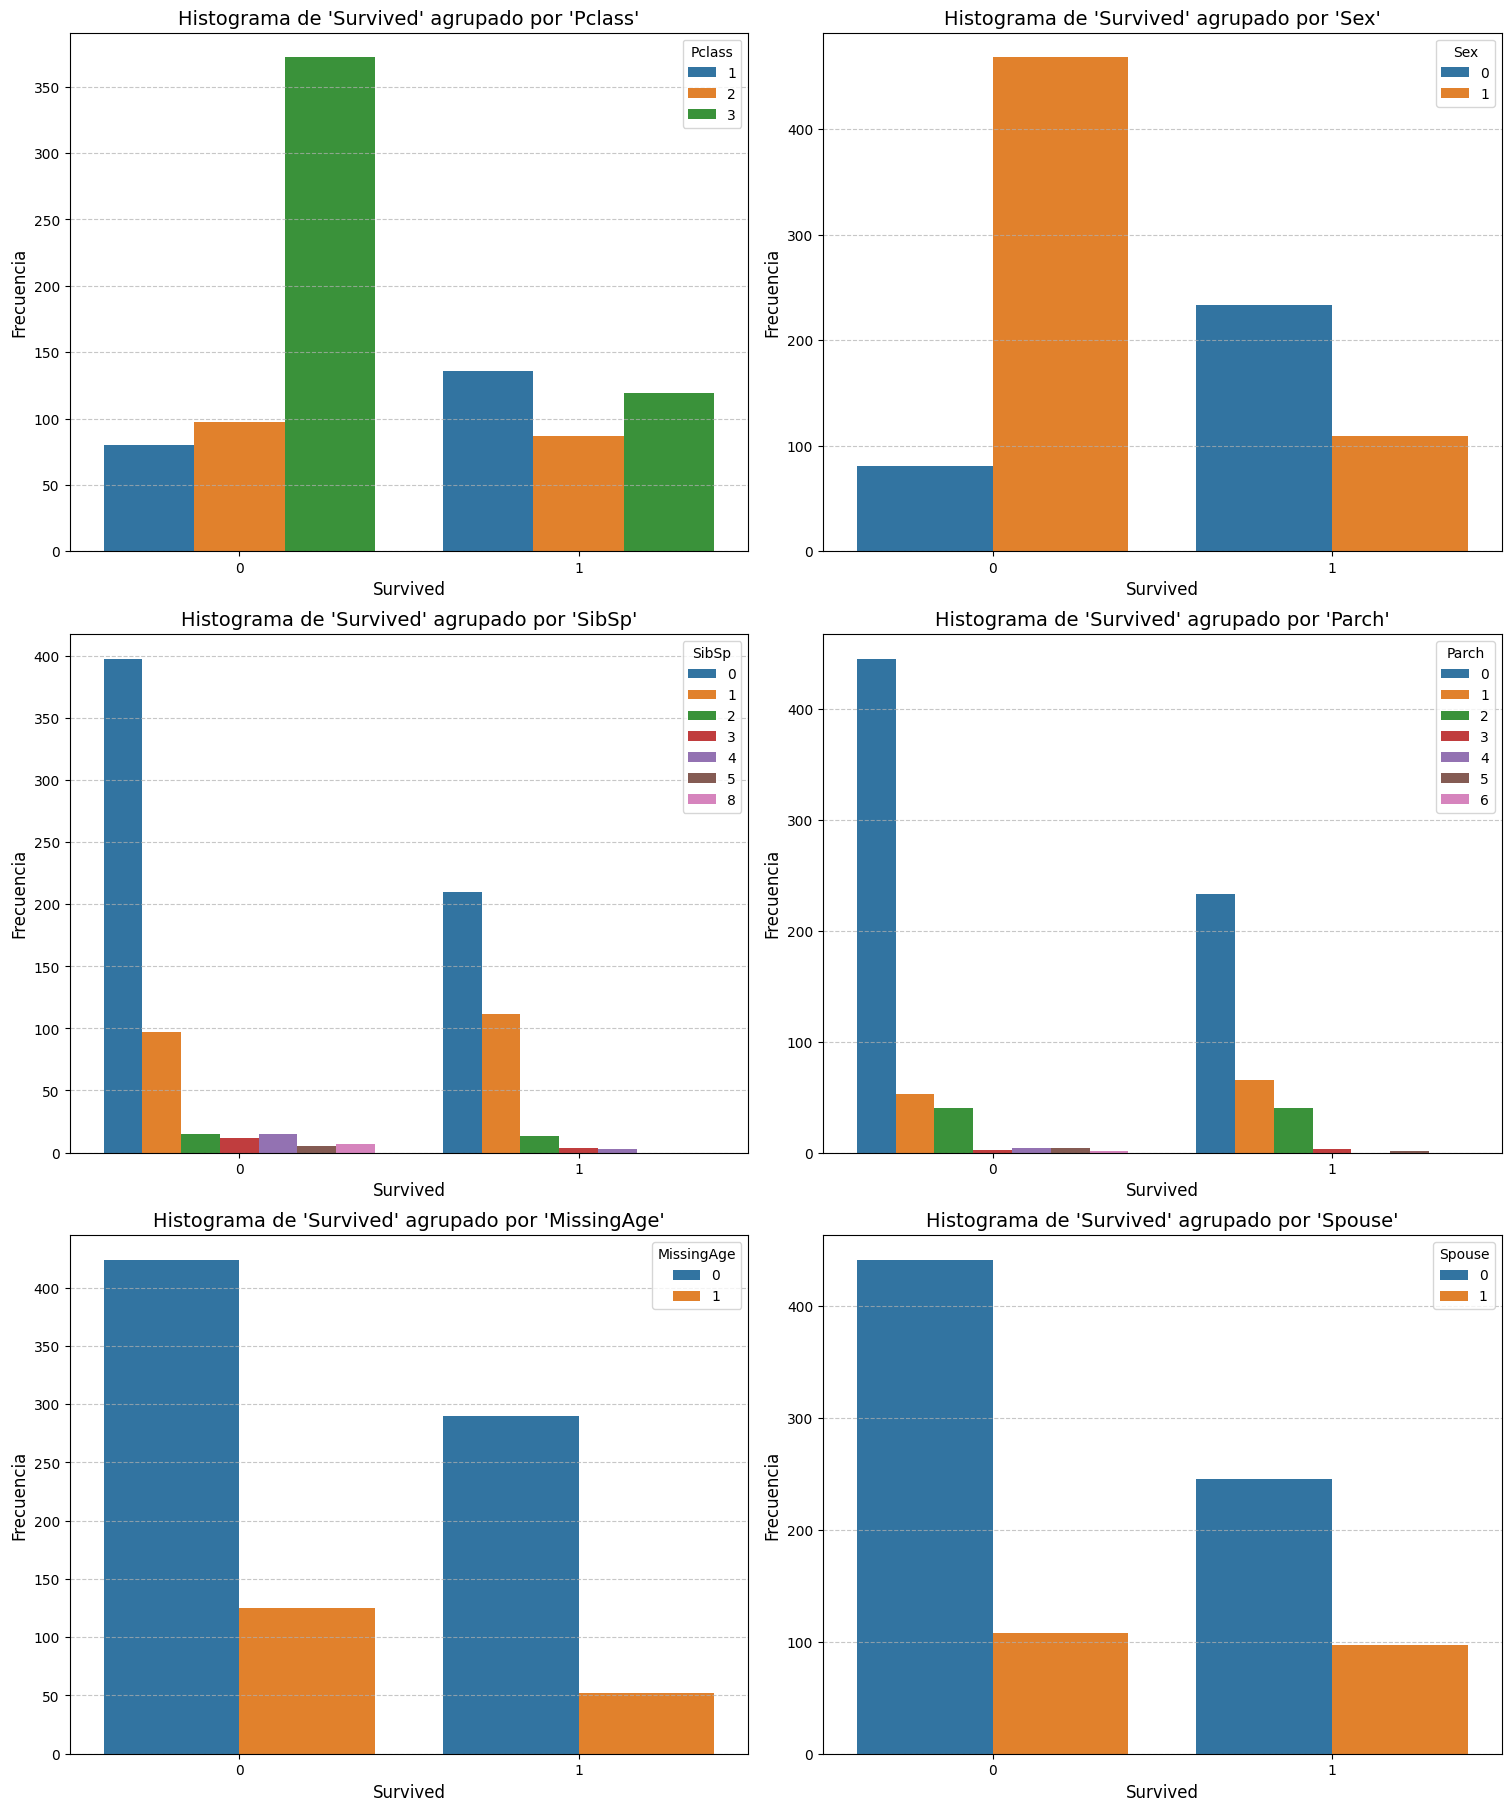

['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

In [14]:
filter_and_plot_features(df_titanic, target_col="Survived")